In [35]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

def get_data_json(dir):
    with open(dir, encoding='utf-8') as f:
        data = json.load(f)
    return data

dr = 'D:\__PROJECTS___/Data/'

In [33]:
df = pd.read_json('productToMNN.json')


products = pd.DataFrame(get_data_json(dr+'products.json'))
property = pd.DataFrame(get_data_json(dr+'property.json'))
propertyM = pd.DataFrame(get_data_json(dr+'propertyMultipleValues.json'))
propertyV = pd.DataFrame(get_data_json(dr+'propertyValues.json'))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

# Файл для преобразования активного вещества в id для отправки на сервер

In [ ]:
df[["MNN_ID", "MNN_NAME", "MNN_CODE"]].drop_duplicates().to_csv('ID2Prod.txt') 

# Формирование JSON для бд на сервер

In [5]:
df.dropna()

,MNN_ID,PRODUCT_ID,MNN_NAME,MNN_CODE
0,53,461363.0,Силденафил,sildenafil
1,53,461364.0,Силденафил,sildenafil
2,53,461365.0,Силденафил,sildenafil
3,53,461366.0,Силденафил,sildenafil
4,53,461367.0,Силденафил,sildenafil
...,...,...,...,...
17225,1662,494983.0,"Дифенгидрамин, Парацетамол",difengidramin_paratsetamol
17227,93,494984.0,Ганцикловир,gantsiklovir
17228,231,963082.0,Метоксален,metoksalen
17229,746,494985.0,Мелатонин,melatonin


In [100]:
products

,ID,NAME
0,461363,"Виагра, таблетки 100 мг, 2 шт."
1,461364,"Виагра, таблетки 50 мг, 2 шт."
2,461365,"Виагра, таблетки 25 мг, 1 шт."
3,461366,"Виагра, таблетки 50 мг, 1 шт."
4,461367,"Виагра, таблетки 50 мг, 4 шт."
...,...,...
40017,1311472,Medhelp Лейкопластырь фиксирующий на шелковой ...
40018,1311513,"Топинамбур Премиум сироп без сахара, 250 мл"
40019,1311514,Maneki Диски ватные двусторонние косметические...
40020,1311515,Vichy Purete Thermale набор Тоник 200 мл+Гель ...


In [104]:
propertyM

,IBLOCK_ELEMENT_ID,IBLOCK_PROPERTY_ID,VALUE,VALUE_ENUM,VALUE_NUM,DESCRIPTION
0,461363,356,6817,None,6817.0,None
1,461363,356,9528,None,9528.0,None
2,461364,356,6817,None,6817.0,None
3,461365,356,6817,None,6817.0,None
4,461366,356,6817,None,6817.0,None
...,...,...,...,...,...,...
67572,1296503,276,886694,None,886694.0,
67573,1297833,276,464861,None,464861.0,
67574,1297833,276,515491,None,515491.0,
67575,1299717,276,1033550,None,1033550.0,


In [145]:
col = ['ID_PRODUCT']
for i, I in property.drop(index=[20, 21, 23]).iterrows():
    col.append(I.CODE)
propertyV.columns = col
propertyV

,ID_PRODUCT,ALSO_BUY,ANALOGS,BRAND_ID,BUY_COUNT,COUNTRY,COURSE_QUANTITY,DOSAGE,DRUG_FORM,FEATURES,...,MANUFACTURER,MANUFACTURER,MANUFACTURER_ID,NEED_RECIPE,OFFER_TYPE,PACKING,PHARMACOLOGICAL_SECTION,SPECIAL_s1,TYPE,VENDOR_CODE
0,461363,"a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",23a5c4b5-6f26-4053-b728-cb864a4edcbd,66,США,NaN,100 мг,таблетки,100177,...,Пфайзер,,a219a283-5674-498e-a828-d11bd7d7c4fc,0.0,drug,2,"a:3:{s:5:""VALUE"";a:2:{i:0;s:4:""6817"";i:1;s:4:""...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",RX,
1,461364,"a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",23a5c4b5-6f26-4053-b728-cb864a4edcbd,26,США,NaN,50 мг,таблетки,100178,...,Пфайзер,,a219a283-5674-498e-a828-d11bd7d7c4fc,0.0,drug,2,"a:3:{s:5:""VALUE"";a:1:{i:0;s:4:""6817"";}s:11:""DE...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",RX,
2,461365,"a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",23a5c4b5-6f26-4053-b728-cb864a4edcbd,20,США,NaN,25 мг,таблетки,100180,...,Пфайзер,,a219a283-5674-498e-a828-d11bd7d7c4fc,0.0,drug,1,"a:3:{s:5:""VALUE"";a:1:{i:0;s:4:""6817"";}s:11:""DE...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",RX,
3,461366,"a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",23a5c4b5-6f26-4053-b728-cb864a4edcbd,28,США,NaN,50 мг,таблетки,100183,...,Пфайзер,,a219a283-5674-498e-a828-d11bd7d7c4fc,0.0,drug,1,"a:3:{s:5:""VALUE"";a:1:{i:0;s:4:""6817"";}s:11:""DE...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",RX,
4,461367,"a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",23a5c4b5-6f26-4053-b728-cb864a4edcbd,22,США,NaN,50 мг,таблетки,100184,...,Пфайзер,,a219a283-5674-498e-a828-d11bd7d7c4fc,0.0,drug,4,"a:3:{s:5:""VALUE"";a:2:{i:0;s:4:""6817"";i:1;s:4:""...","a:3:{s:5:""VALUE"";a:0:{}s:11:""DESCRIPTION"";a:0:...",RX,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40017,1311472,None,None,9aca1a48-6306-b673-9141-c7c6dcedd585,7,None,NaN,,,,...,None,,a0cf8fbc-e423-ab7b-e017-add4c7777ead,0.0,None,,None,None,ПФ,None
40018,1311513,None,None,,1,None,NaN,,,490492,...,None,,64bad913-7136-939b-64ec-ea9f7093651c,0.0,None,250 мл,None,None,ПФ,None
40019,1311514,None,None,ebadd128-2438-4f50-8609-2a74188b1393,2,None,NaN,,,,...,None,,7321bc80-f24a-4ee1-8ae8-d51e9cca9df6,0.0,None,,None,None,ПФ,None
40020,1311515,None,None,26baf9da-8f8e-49fb-97cb-c0b1ed6ae21d,6,None,NaN,,,,...,None,,7c54231b-5026-466e-a1d5-1deecdb0443d,0.0,None,,None,None,ПФ,None


In [158]:
propertyV['COURSE_QUANTITY'].dropna()

1812     2.0
7320     2.0
28743    0.0
Name: COURSE_QUANTITY, dtype: float64

In [6]:
df.columns = ['ID_DRUG', 'ID_PRODUCT', 'NAME_DRUG', 'DRUG_CODE']
products.columns = ['ID_PRODUCT', 'NAME_PRODUCT']
df = df.dropna()
df['ID_PRODUCT'] = df['ID_PRODUCT'].apply(lambda x:int(x))

In [154]:
drug = pd.DataFrame.merge(df, products, how='right', on=['ID_PRODUCT'])
drug

,ID_DRUG,ID_PRODUCT,NAME_DRUG,DRUG_CODE,NAME_PRODUCT
0,53.0,461363,Силденафил,sildenafil,"Виагра, таблетки 100 мг, 2 шт."
1,53.0,461364,Силденафил,sildenafil,"Виагра, таблетки 50 мг, 2 шт."
2,53.0,461365,Силденафил,sildenafil,"Виагра, таблетки 25 мг, 1 шт."
3,53.0,461366,Силденафил,sildenafil,"Виагра, таблетки 50 мг, 1 шт."
4,53.0,461367,Силденафил,sildenafil,"Виагра, таблетки 50 мг, 4 шт."
...,...,...,...,...,...
40017,NaN,1311472,NaN,NaN,Medhelp Лейкопластырь фиксирующий на шелковой ...
40018,NaN,1311513,NaN,NaN,"Топинамбур Премиум сироп без сахара, 250 мл"
40019,NaN,1311514,NaN,NaN,Maneki Диски ватные двусторонние косметические...
40020,NaN,1311515,NaN,NaN,Vichy Purete Thermale набор Тоник 200 мл+Гель ...


In [162]:
drugs = pd.DataFrame.merge(drug, propertyV[['ID_PRODUCT','DOSAGE', 'DRUG_FORM', 'PACKING']], how='left', on=['ID_PRODUCT'])

In [163]:
drugs.to_json('drugs.json')

# Поиск пользователей для подписки

In [36]:
basket = pd.DataFrame(get_data_json(dr+'basket.json')) # корзина
order = pd.DataFrame(get_data_json(dr+'orders.json')) # пользователи
products = pd.read_json('products.json')

In [41]:
basket.columns = ['ID', 'PRODUCT_ID', 'QANTITY', 'PRICE', 'DETAIL_PAGE_URL']
order = order[['ID', 'DATE_INSERT', 'USER_ID']]
products.columns = ['PRODUCT_ID', 'PRODUCT_NAME']

In [43]:
b = pd.DataFrame.merge(basket, order, how='left', on=['ID'])
buys = pd.DataFrame.merge(b,products, how='left', on=['PRODUCT_ID'])

In [8]:
buys = pd.read_json(dr+'buys.json')

In [44]:
buys

,ID,PRODUCT_ID,QANTITY,PRICE,DETAIL_PAGE_URL,DATE_INSERT,USER_ID,PRODUCT_NAME
0,11881925,873128,1.0,2554.0,/goods/id303563/,2021-03-01 00:00:03,2270260,"Солгар для кожи, ногтей и волос, таблетки 120 шт."
1,11881927,461853,4.0,675.0,/goods/id116631/,2021-03-01 00:00:12,457662,"Солкосерил, мазь 5%, 20 г"
2,11881937,466634,4.0,222.0,/spb/goods/id215482/,2021-03-01 00:01:19,3408182,"Липобейз, крем, 75 мл"
3,11881937,465982,4.0,179.0,/spb/goods/id214008/,2021-03-01 00:01:19,3408182,"Сонные, таблетки, 30 шт."
4,11881937,477396,4.0,126.0,/spb/goods/id241663/,2021-03-01 00:01:19,3408182,"911 Шампунь нейтральный, 150 мл"
...,...,...,...,...,...,...,...,...
1254293,13584077,466585,1.0,520.0,/saratov/goods/id215398/,2021-05-21 17:31:13,4792735,"Изопринозин, таблетки 500 мг 20 шт."
1254294,13584321,463097,2.0,348.0,/perm/goods/id20631/,2021-05-21 17:44:01,2781936,"Энтерофурил, суспензия 200 мг/5 мл, 90 мл"
1254295,13584324,468104,1.0,2382.0,/tolyatti/goods/id219056/,2021-05-21 17:44:00,4094658,"Индинол Форто, капсулы, 60 шт."
1254296,13584488,464160,1.0,828.0,/goods/id209967/,2021-05-21 17:52:40,444128,"Тест-полоски Контур ТС (Contour TS), 50 шт."


In [45]:
gbbuys = buys.groupby('USER_ID')
users = buys['USER_ID'].drop_duplicates()

In [61]:
count_user = 0 # -- Количество пользователей которым нужна будет подписка
dictus = {'USER_ID':[], 'IS_SUB':[], 'PHONE':[], 'ID_PRODUCT':[], 'PRODUCT_NAME':[]}
for ind, id in users.items():
    df = gbbuys.get_group(id)
    dictus['USER_ID'].append(id)
    dictus['PHONE'].append(89001234567)
    vcs = df['PRODUCT_ID'].value_counts()
    most = df['PRODUCT_ID'].value_counts().index[0]
    if len(df[df['PRODUCT_ID']==most]['ID'].drop_duplicates()) > 2:
      count_user += 1
      dictus['IS_SUB'].append(1)
      dictus['ID_PRODUCT'].append(most)
      dictus['PRODUCT_NAME'].append(df[df['PRODUCT_ID']==most]['PRODUCT_NAME'])
    else:
      dictus['IS_SUB'].append(0)
      dictus['ID_PRODUCT'].append(0)
      dictus['PRODUCT_NAME'].append('None')

In [62]:
pd.DataFrame(dictus).to_json('usersProduct.json') # для записи в бд

In [53]:
df1

,USER_ID,IS_SUB,PHONE,ID_PRODUCT,PRODUCT_NAME
0,2270260,False,89001234567,NaN,None
1,457662,False,89001234567,NaN,None
2,3408182,False,89001234567,NaN,None
3,404621,False,89001234567,NaN,None
4,1773822,False,89001234567,NaN,None
...,...,...,...,...,...
108655,4933018,False,89001234567,NaN,None
108656,4933956,False,89001234567,NaN,None
108657,4799062,False,89001234567,NaN,None
108658,4937213,False,89001234567,NaN,None


In [ ]:
df1.to_json('usersProduct.json')

In [12]:
print("ВСЕГО ПОЛЬЗОВАТЕЛЕЙ В ВЫБОРКЕ:\t", len(users.value_counts()))
print("КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ, КОТОРЫМ РЕКОМЕНДОВАНА ПОДПИСКА:\t", count_user)

ВСЕГО ПОЛЬЗОВАТЕЛЕЙ В ВЫБОРКЕ:	 108660
КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ, КОТОРЫМ РЕКОМЕНДОВАНА ПОДПИСКА:	 18050


(-1.1102921983456704,
 1.191307306736415,
 -1.1056031673219318,
 1.1063289644415168)

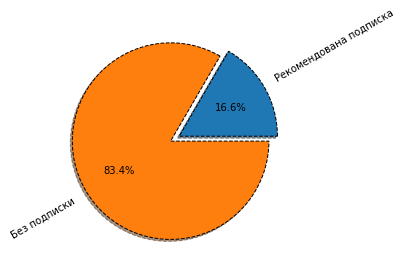

In [13]:
percent = count_user / len(users) * 100
vals = [percent, 100-percent]
labels = ['Рекомендована подписка', 'Без подписки']
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

## В данном случае пользователем которому стоит порекомендовать подписку считается такой пользователь, который совершил более 2 уникальных покупок одного товара. Уникальной покупкой считается такая покупка лекарства которая была произведена не в один день, в разных корзинах. 

In [20]:
for ind, id in users.items():
    df = gbbuys.get_group(id)

In [31]:
df = gbbuys.get_group(3408182)
df

,ID,PRODUCT_ID,QANTITY,PRICE,DETAIL_PAGE_URL,DATE_INSERT,USER_ID
2,11881937,466634,4,222.0,/spb/goods/id215482/,2021-03-01 00:01:19,3408182
3,11881937,465982,4,179.0,/spb/goods/id214008/,2021-03-01 00:01:19,3408182
4,11881937,477396,4,126.0,/spb/goods/id241663/,2021-03-01 00:01:19,3408182
545316,12611735,826399,2,198.0,/spb/goods/id296172/,2021-04-04 21:19:08,3408182
545317,12611735,473450,5,4.0,/spb/goods/id234140/,2021-04-04 21:19:08,3408182
545318,12611735,947696,1,1146.0,/spb/goods/id294524/,2021-04-04 21:19:08,3408182
545319,12611735,471504,1,301.0,/spb/goods/id227381/,2021-04-04 21:19:08,3408182
545320,12611735,1169345,1,104.0,/spb/goods/id498514/,2021-04-04 21:19:08,3408182
545321,12611735,624407,2,86.0,/spb/goods/id44413/,2021-04-04 21:19:08,3408182
684657,12794324,465568,1,501.0,/spb/goods/id213089/,2021-04-12 22:45:30,3408182


In [25]:
drug = pd.read_json('drugs.json')

In [26]:
drug 

,ID_DRUG,ID_PRODUCT,NAME_DRUG,DRUG_CODE,NAME_PRODUCT,DOSAGE,DRUG_FORM,PACKING
0,53.0,461363,Силденафил,sildenafil,"Виагра, таблетки 100 мг, 2 шт.",100 мг,таблетки,2
1,53.0,461364,Силденафил,sildenafil,"Виагра, таблетки 50 мг, 2 шт.",50 мг,таблетки,2
2,53.0,461365,Силденафил,sildenafil,"Виагра, таблетки 25 мг, 1 шт.",25 мг,таблетки,1
3,53.0,461366,Силденафил,sildenafil,"Виагра, таблетки 50 мг, 1 шт.",50 мг,таблетки,1
4,53.0,461367,Силденафил,sildenafil,"Виагра, таблетки 50 мг, 4 шт.",50 мг,таблетки,4
...,...,...,...,...,...,...,...,...
40017,NaN,1311472,None,None,Medhelp Лейкопластырь фиксирующий на шелковой ...,,,
40018,NaN,1311513,None,None,"Топинамбур Премиум сироп без сахара, 250 мл",,,250 мл
40019,NaN,1311514,None,None,Maneki Диски ватные двусторонние косметические...,,,
40020,NaN,1311515,None,None,Vichy Purete Thermale набор Тоник 200 мл+Гель ...,,,
